# Solving TSP for benchmarking 

In [1]:
# Lazy importing 
import sys 
from utils import get_distance_matrices
from pprint import pprint

sys.path.append('..')

In [2]:

dm = get_distance_matrices()
# pprint(dm)


In [ ]:
from travelingsalesperson import TSP 
from amplify import solve

# lazy injection
n = 7

problem = dm['dense']['low'][str(n)]

# setting up the TSP problem 
tsp = TSP.from_distance_matrix(problem)

qp, formulating_time = tsp.qubo(format="amplify", penalty=1_000_000)
model = qp["model"]
print(tsp.distance_matrix)


Total time taken in :  qubo 0.015744924545288086
[[0 3 6 5 3 6 8]
 [3 0 5 4 2 7 5]
 [6 5 0 6 6 3 7]
 [5 4 6 0 9 9 8]
 [3 2 6 9 0 2 5]
 [6 7 3 9 2 0 2]
 [8 5 7 8 5 2 0]] 0.015744924545288086


## Brute Force

Total time taken in :  brute_force 0.01273488998413086
Tour:  (0, 1, 3, 2, 5, 6, 4) Cost:  26


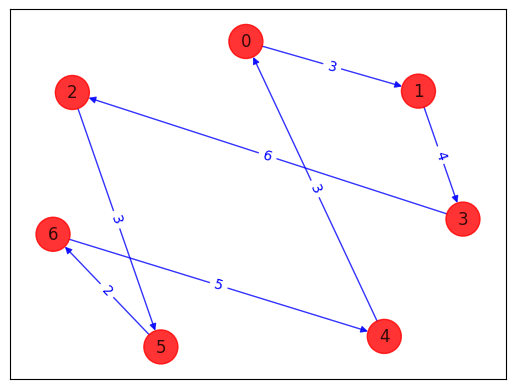

In [18]:
try:
    (tour, cost), dur = tsp.brute_force()
    tsp.draw_tour(tour)

    print("Tour: ", tour, "Cost: ", cost)
except KeyboardInterrupt as e:
    print(e)
    cost = -1
    dur = -1
    tour = [-1]

from utils import add_data
add_data(n, cost, dur, tour, "Bruteforce")

## Fixstars Amplify AE

In [19]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarClient

clientFS = GetFixstarClient()

# Solve set partitioning and view result
resultF = solve(model, clientFS)

tsp.interpret(resultF, solver="Fixstar", verbose=True)

Cost: 26.0
Optimal tour: [1. 0. 3. 2. 5. 6. 4.]
Execution time: 0:00:00.935619


## Gurobi

In [ ]:
from Utils.solvers import GetGurobiClient

# for window with conda env
clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
resultG = solve(model, clientG)

tourG = tsp.interpret(resultG, solver="Gurobi", verbose=True)

Cost: 26.0
Optimal tour: [0. 4. 1. 6. 5. 2. 3.]
Execution time: 0:00:00.054999


## D-Wave

In [24]:
from Utils.solvers import GetDWaveClient

clientDWave = GetDWaveClient()
clientDWave.parameters.num_reads = 3_000
result = solve(model, clientDWave)
try:
    tourD = tsp.interpret(result, solver="D-Wave", verbose=True)
except RuntimeError as e:
    print(e)
    add_data(n, -1, -1, [-1], "D-Wave")

Cost: 32.0
Optimal tour: [4. 6. 5. 0. 1. 3. 2.]
Execution time: 0:00:00.426521
